In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 180

In [2]:
from tmtoolkit.utils import unpickle_file

models = unpickle_file('data/tm_final_results.pickle')
models

[({'eta': 0.7,
   'n_topics': 180,
   'alpha': 0.05555555555555555,
   'n_iter': 2000,
   'random_state': 20200918},
  {'model': <lda.lda.LDA at 0x7f08680c5e80>,
   'cao_juan_2009': 0.11512976617805985,
   'arun_2010': 240.13476983487237,
   'coherence_mimno_2011': -1.5269574077666448}),
 ({'eta': 0.9,
   'n_topics': 180,
   'alpha': 0.05555555555555555,
   'n_iter': 2000,
   'random_state': 20200918},
  {'model': <lda.lda.LDA at 0x7f08680d8970>,
   'cao_juan_2009': 0.11787665410482431,
   'arun_2010': 251.6912567275862,
   'coherence_mimno_2011': -1.5321521355858605}),
 ({'eta': 0.7,
   'n_topics': 200,
   'alpha': 0.05,
   'n_iter': 2000,
   'random_state': 20200918},
  {'model': <lda.lda.LDA at 0x7f08680dfd60>,
   'cao_juan_2009': 0.11403311473801361,
   'arun_2010': 232.2083384928255,
   'coherence_mimno_2011': -1.5198614066534426}),
 ({'eta': 0.9,
   'n_topics': 200,
   'alpha': 0.05,
   'n_iter': 2000,
   'random_state': 20200918},
  {'model': <lda.lda.LDA at 0x7f0822955490>,
   

In [3]:
ldamodel = models[0][1]['model']
ldamodel

In [4]:
from tmtoolkit.utils import pickle_data

pickle_data(ldamodel, 'data/tm_final_k180_eta0.7.pickle')

In [6]:
doc_topic = ldamodel.doc_topic_
topic_word = ldamodel.topic_word_

In [7]:
doc_labels, vocab, dtm = unpickle_file('data/dtm.pickle')
doc_labels = np.array(doc_labels)
vocab = np.array(vocab)
len(doc_labels), len(vocab), dtm.shape

(32921, 3278, (32921, 3278))

In [8]:
doc_labels[:10]

array(['007-drehorte-in-europa-klimavertraeglicher-james-bond-a-1295233',
       '070-shake-in-berlin-vertrauensuebung-mit-einer-emo-rapperin-a-7c4a0eb3-7c1b-474c-aaee-f2de6e165362',
       '1-fc-heidenheim-in-der-relegation-demoliert-in-die-groessten-spiele-der-vereinsgeschichte-a-383ce249-6865-4bfa-a8ea-2a89894ad7b2',
       '1-fc-heidenheim-unterliegt-werder-bremen-in-der-relegation-da-helfen-auch-keine-klatschpfannen-a-ea0861b0-dd7c-403a-99ab-38b6c25c7aed',
       '1-fc-kaiserslautern-beantragt-in-der-3-liga-insolvenz-pfaelzer-sauplan-a-69b7ee5a-5cc8-4f8c-9f67-c5f455a3ec9f',
       '1-fc-kaiserslautern-fussball-drittligist-stellt-antrag-auf-plan-insolvenz-a-fb530286-9b7b-4cd7-ae1f-9a876cc3f700',
       '1-fc-koeln-beendet-kooperation-mit-china-totaler-ueberwachungsstaat-a-1301960',
       '1-fc-koeln-holt-horst-heldt-und-markus-gisdol-neue-gesichter-alte-zweifel-a-1297292',
       '1-fc-koeln-kontert-kuendigung-eines-mitglieds-wegen-moschee-auf-dem-trikot-a-0fc58882-dffd-4f84-a157-

In [9]:
vocab[:10]

array(['10', '11', '20', 'ab', 'abbauen', 'abbrechen', 'abend', 'abends',
       'abgeben', 'abgeordnete'], dtype='<U27')

In [10]:
dtm

<32921x3278 sparse matrix of type '<class 'numpy.int32'>'
	with 4247828 stored elements in Compressed Sparse Row format>

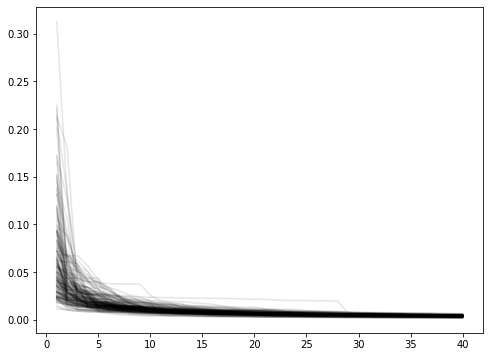

In [24]:
import matplotlib.pyplot as plt

topic_word_desc = -np.sort(-topic_word, axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
n_terms = 40
term_ranks = np.arange(1, n_terms+1)
for t in topic_word_desc:
    ax.plot(term_ranks, t[:n_terms], color = 'black', alpha=0.1)

fig;

In [53]:
highlight_topics = np.argsort(-topic_word_desc[:, [0, 8, 25]], axis=0)[0, :]
highlight_topics

array([131, 158,  93])

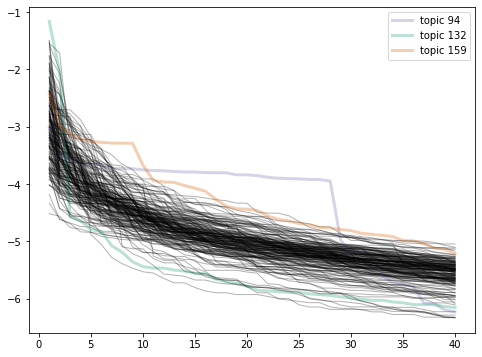

In [66]:
palette = plt.get_cmap('Dark2')

fig, ax = plt.subplots(figsize=(8, 6))
highlight_topics_handles = []
for i, t in enumerate(topic_word_desc):
    highlight_index = np.where(i == highlight_topics)[0]
    if len(highlight_index) > 0:
        color = palette(highlight_index[0])
        label = 'topic ' + str(i+1)
        lw = 3
    else:
        color = 'black'
        label = 'other topics'
        lw = 1
    
    hndl, = ax.plot(term_ranks, np.log(t[:n_terms]), color=color, label=label, lw=lw, alpha=0.3)
    
    if len(highlight_index) > 0:
        highlight_topics_handles.append(hndl)

ax.legend(handles=highlight_topics_handles, loc='best')
fig;

In [67]:
from tmtoolkit.topicmod.model_io import save_ldamodel_summary_to_excel

save_ldamodel_summary_to_excel('output/tm_final_k180_eta0.7.xlsx',
                               topic_word, doc_topic, doc_labels, vocab,
                               dtm = dtm)

OrderedDict([('top_doc_topics_vals',
                                                                    rank_1    rank_2  \
              007-drehorte-in-europa-klimavertraeglicher-jame...  0.297049  0.134549   
              070-shake-in-berlin-vertrauensuebung-mit-einer-...  0.392929  0.149293   
              1-fc-heidenheim-in-der-relegation-demoliert-in-...  0.271422  0.148540   
              1-fc-heidenheim-unterliegt-werder-bremen-in-der...  0.504156  0.153762   
              1-fc-kaiserslautern-beantragt-in-der-3-liga-ins...  0.197332  0.111310   
              ...                                                      ...       ...   
              zwoelf-kinder-als-chefsache-a-d4533bfa-668c-492...  0.266950  0.123099   
              zyklon-amphan-trifft-auf-indien-und-bangladesch...  0.192749  0.188054   
              zypern-diebe-stehlen-koffer-mit-urne-darin-a-13...  0.284411  0.135158   
              zypern-mutmassliche-urnendiebe-gefasst-familie-...  0.400694  0.15069

In [11]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths = doc_lengths(dtm)
topic_labels = generate_topic_labels_from_top_words(
    topic_word,
    doc_topic,
    doc_lengths,
    vocab,
    lambda_=0.6
)


In [23]:
topic_labels

array(['1_bundeswehr_soldat', '2_dollar_milliarde', '3_japan_olympische',
       '4_mitarbeiter_unternehmen', '5_hongkong_peking',
       '6_rassismus_floyd', '7_öffnen_erlauben', '8_frage_leserin',
       '9_afghanistan_saudiarabien', '10_essen_weihnachten',
       '11_leiche_ermittler', '12_repräsentativ_umfrage',
       '13_pandemie_corona', '14_gesetz_künftig', '15_scholz_spd',
       '16_beid_streit', '17_film_art', '18_hamburg_hamburger',
       '19_gericht_urteil', '20_russland_russisch', '21_krieg_weltkrieg',
       '22_person_wer', '23_geld_zahlen', '24_maske_maskenpflicht',
       '25_flüchtling_migranten', '26_grad_temperatur',
       '27_altmaier_peter', '28_neuinfektionen_zahl', '29_de_tour',
       '30_angeles_los', '31_demonstration_teilnehmer', '32_west_osten',
       '33_meter_wasser', '34_gericht_verurteilen', '35_spahn_test',
       '36_begriff_medium', '37_telefon_kreis',
       '38_staatsanwaltschaft_ermittler', '39_kirche_museum',
       '40_rennen_platz', '41_lan

In [26]:
from tmtoolkit.topicmod.model_stats import marginal_topic_distrib

marg_topic = marginal_topic_distrib(doc_topic, doc_lengths)
list(zip(topic_labels, marg_topic))

[('1_bundeswehr_soldat', 0.00257058115466531),
 ('2_dollar_milliarde', 0.0062129589754650995),
 ('3_japan_olympische', 0.0032107623769172303),
 ('4_mitarbeiter_unternehmen', 0.0036964252735752195),
 ('5_hongkong_peking', 0.0028703000451081482),
 ('6_rassismus_floyd', 0.004797427198425937),
 ('7_öffnen_erlauben', 0.003911016251431849),
 ('8_frage_leserin', 0.0032114517746828657),
 ('9_afghanistan_saudiarabien', 0.003583876459387073),
 ('10_essen_weihnachten', 0.0016874897798748614),
 ('11_leiche_ermittler', 0.0042817434732685),
 ('12_repräsentativ_umfrage', 0.00855798855466132),
 ('13_pandemie_corona', 0.007453467938099067),
 ('14_gesetz_künftig', 0.006448918907538592),
 ('15_scholz_spd', 0.00514431563045081),
 ('16_beid_streit', 0.0026768836102853415),
 ('17_film_art', 0.0034058602869719745),
 ('18_hamburg_hamburger', 0.0019058711620584207),
 ('19_gericht_urteil', 0.006886340696453442),
 ('20_russland_russisch', 0.004301688446330575),
 ('21_krieg_weltkrieg', 0.005417667001931568),
 ('2

In [28]:
list(sorted(zip(topic_labels, marg_topic), key=lambda x: x[1], reverse=True))

[('80_the_of', 0.054236928702550966),
 ('93_uhr_coronavirus', 0.029571026560982604),
 ('124_mal_ja', 0.014374745265320217),
 ('113_schon_scheinen', 0.01337537132236065),
 ('46_erzählen_haus', 0.012819260770511466),
 ('170_spiegel_ja', 0.01242520343052222),
 ('111_schon_wohl', 0.012108321897244987),
 ('85_minute_tor', 0.01143512360040643),
 ('120_prozent_quartal', 0.009954879654134127),
 ('28_neuinfektionen_zahl', 0.00991895998267314),
 ('90_virus_sarscov2', 0.00984138287618377),
 ('129_jahr_heute', 0.008902800003233681),
 ('179_bayer_dortmund', 0.008807259347560872),
 ('123_prozent_zahl', 0.008563049090194631),
 ('12_repräsentativ_umfrage', 0.00855798855466132),
 ('50_lockerungen_öffnung', 0.008541620456734816),
 ('34_gericht_verurteilen', 0.008464579662796816),
 ('125_trump_donald', 0.008180915890145496),
 ('108_maßnahme_schließen', 0.008052878777553367),
 ('137_leben_mensch', 0.007949480573088518),
 ('76_coronavirus_wuhan', 0.007899351770218839),
 ('139_rede_wort', 0.0078193840167488

In [29]:
from tmtoolkit.topicmod.model_stats import most_probable_words, least_probable_words

most_probable_words(vocab, topic_word, doc_topic, doc_lengths, n=20)

array(['the', 'sagen', 'jahr', 'mehr', 'geben', 'mensch', 'sollen',
       'weit', 'gehen', 'of', 'kommen', 'gut', 'all', 'to', 'erst',
       'groß', 'land', 'seit', 'deutschland', 'schon'], dtype='<U27')

In [30]:
least_probable_words(vocab, topic_word, doc_topic, doc_lengths, n=20)

array(['anhören', 'geboren', 'inhaltlich', 'riesige', 'signalisieren',
       'país', 'mitnehmen', 'spürbar', 'journalistische', 'grundlegend',
       'erwerben', 'anderthalb', 'redaktionell', 'potenzial', 'geradezu',
       'vorherig', 'wohin', 'fernsehsender', 'beschweren', 'vertreiben'],
      dtype='<U27')

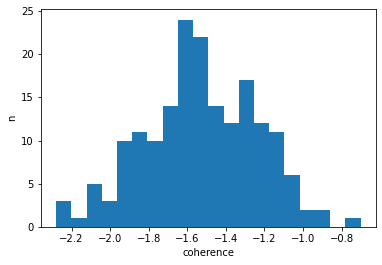

In [32]:
from tmtoolkit.topicmod.evaluate import metric_coherence_mimno_2011

coh = metric_coherence_mimno_2011(topic_word, dtm, top_n=20)

plt.hist(coh, bins=20)
plt.xlabel('coherence')
plt.ylabel('n')
plt.show();

In [33]:
top10_t_indices = np.argsort(coh)[::-1][:5]
bottom10_t_indices = np.argsort(coh)[:5]

topic_labels[top10_t_indices]

array(['80_the_of', '159_we_you', '180_corona_coronakrise',
       '20_russland_russisch', '111_schon_wohl'], dtype='<U33')

In [34]:
topic_labels[bottom10_t_indices]

array(['62_aktivist_gruppe', '52_halle_anschlag', '29_de_tour',
       '58_kritik_kritisieren', '134_regierung_präsident'], dtype='<U33')

In [37]:
from tmtoolkit.topicmod.model_stats import topic_word_relevance

topic_word_rel = topic_word_relevance(topic_word, doc_topic,
                                      doc_lengths, lambda_=0.6)
topic_word_rel

array([[-6.56622682, -6.47633154, -6.48707646, ..., -6.72499435,
        -6.64484627, -5.20960509],
       [-7.43442808, -7.3445328 , -7.35527771, ..., -6.70589241,
        -5.11515226, -7.42773306],
       [-6.78071434, -6.69081905, -6.70156397, ..., -5.58955515,
        -5.97203059, -6.77401932],
       ...,
       [-7.14246662, -7.05257133, -7.06331625, ..., -7.30123414,
        -5.31684861, -7.1357716 ],
       [-3.15177778, -4.50491935, -3.50897469, ..., -7.03836263,
        -5.02925396, -6.09519551],
       [-7.59616309, -7.5062678 , -7.51701272, ..., -3.97399302,
        -6.00977477, -7.58946807]])

In [46]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words

top_word_topics = ldamodel_top_topic_words(topic_word_rel, vocab, top_n=10)
top_word_topics

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
topic_1,bundeswehr (0.6355),soldat (0.3942),krampkarrenbauer (-0.3703),truppe (-0.6775),ministerin (-0.7113),einsatz (-0.8529),annegret (-0.9813),mission (-1.206),militärisch (-1.271),spiegelinformationen (-1.342)
topic_2,dollar (0.05512),milliarde (-0.2899),aktie (-0.6834),börse (-0.9755),konzern (-1.109),gewinn (-1.142),unternehmen (-1.181),umsatz (-1.29),prozent (-1.308),investor (-1.432)
topic_3,japan (0.2589),olympische (0.2503),tokio (0.1465),sportler (-0.07964),spiel (-0.3134),sport (-0.3213),japanisch (-0.5006),verband (-0.5119),internationale (-1.369),trainieren (-1.403)
topic_4,mitarbeiter (0.4148),unternehmen (0.2588),firma (0.02642),arbeiter (-0.5722),betrieb (-0.6594),angestellte (-1.134),arbeiten (-1.323),manager (-1.418),konzern (-1.432),beschäftigte (-1.499)
topic_5,hongkong (0.7877),peking (-0.6491),china (-0.6977),gesetz (-0.7209),chinesisch (-1.007),protest (-1.628),aktivist (-1.694),chinesische (-1.838),system (-1.861),aktivität (-1.886)
topic_6,rassismus (0.1346),floyd (0.001969),george (-0.09943),schwarze (-0.2204),polizeigewalt (-0.3907),schwarz (-0.7607),tod (-0.7729),black (-0.8186),polizist (-0.9403),protest (-0.9907)
topic_7,öffnen (-0.15),erlauben (-0.3392),dürfen (-0.4261),auflage (-0.9895),mai (-1.057),besuch (-1.095),person (-1.146),ab (-1.201),privat (-1.278),haushalt (-1.279)
topic_8,frage (-0.5594),leserin (-0.8539),leser (-0.8693),bestellen (-0.8827),beantworten (-0.8884),spiegelde (-0.9631),welt (-1.186),antwort (-1.201),spiegel (-1.221),eltern (-1.455)
topic_9,afghanistan (-0.2351),saudiarabien (-0.4816),konflikt (-1.009),regierung (-1.233),truppe (-1.262),land (-1.285),abkomme (-1.406),vereinigte (-1.43),general (-1.44),unterstützen (-1.452)
